Copyright (c) 2023, Troy Phat Tran (Mr. Troy).<br>
Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST<br>
datasets. MNIST dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

Question:

Create a classifier for the MNIST dataset which includes black-and-white images of 10 digits (0-9). Link:<br>
https://www.tensorflow.org/datasets/catalog/mnist.<br>
The input shape should be (28, 28, 1) because each image has 28*28 pixels and is grayscale.

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

In [10]:
from keras import Sequential
from keras.datasets import mnist
from keras.saving import load_model
import tensorflow as tf
from matplotlib import pyplot as plt

Use Keras dataset

In [19]:
def my_model():
    # Load the MNIST dataset
    dataset = mnist
    (x_train, y_train), (x_test, y_test) = dataset.load_data()

    # Normalize the input data
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Define the model architecture
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])   

    # Define the early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",  patience=5, min_delta=0.01, verbose=1)

    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.reshape((-1, 28, 28, 1))
    # Train the model with the early stopping callback
    history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=10, callbacks=[early_stopping])
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    return model

===============DO NOT EDIT THIS PART================================

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1770 - accuracy: 0.9453 - val_loss: 0.0647 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0689 - accuracy: 0.9800 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0601 - accuracy: 0.9835 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0612 - accuracy: 0.9847 - val_loss: 0.0785 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0814 - accuracy: 0.9841 - val_loss: 0.0970 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1402 - accuracy: 0.9817 - val_loss: 0.2202 - val_accuracy: 0.9782
Epoch 6: early stopping


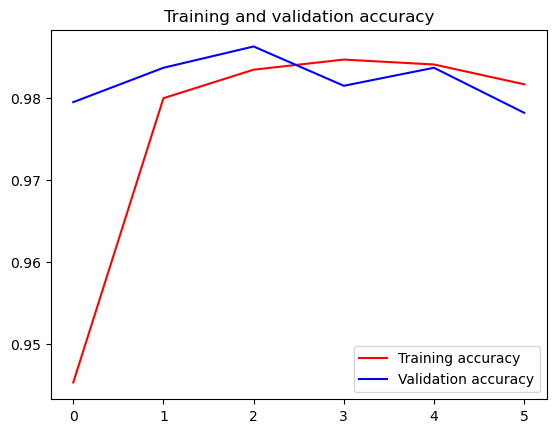

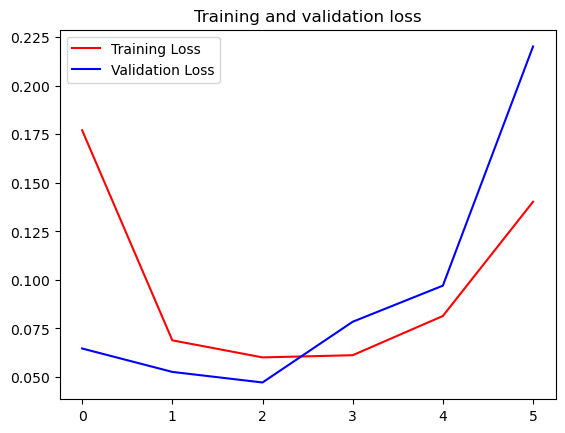

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [20]:
if __name__ == '__main__':
    # Run and save your model
    my_model = my_model()
    filepath = "grayscale_model_1.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)

    # Show the model architecture
    saved_model.summary()